In [6]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [8]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [36]:
# Python SQL toolkit and Object Relational Mapper
# install sqlalchemy to .venv, as it is not installed on system
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [10]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [11]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [12]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [34]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [38]:
inspector = inspect(engine)
inspector.get_columns('measurement')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'primary_key': 0}]

# Exploratory Precipitation Analysis

In [47]:
# Find the most recent date in the data set.
# Viewing csv, Measurement has a "date" column, station does not.
most_recent_measurement_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_measurement_date

('2017-08-23',)

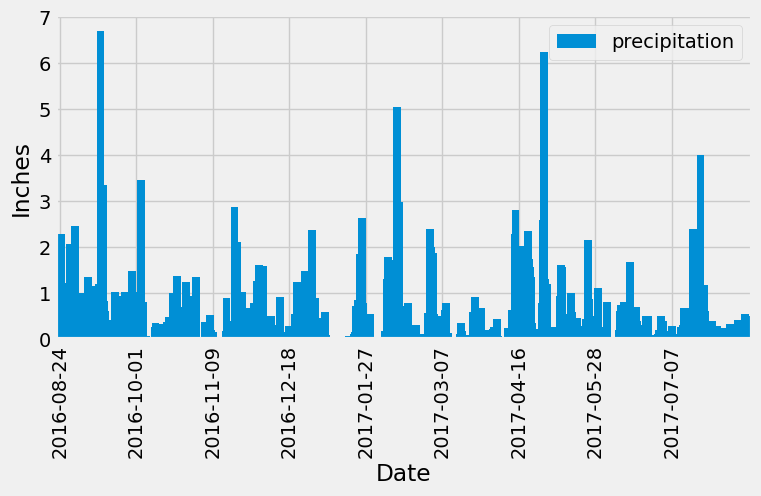

In [90]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date_format = "%Y-%m-%d"
most_recent_date = dt.datetime.strptime(most_recent_measurement_date[0], date_format)

# Calculate the date one year from the last date in data set.
one_year_ago = most_recent_date - dt.timedelta(days=365)

measurement_columns = [Measurement.date,
                       Measurement.prcp]

# Perform a query to retrieve the data and precipitation scores
prev_year_query = session.query(*measurement_columns).\
        filter(Measurement.date > one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prev_year_df = pd.DataFrame(prev_year_query, columns=['date','precipitation'])
#prev_year_df['date'] = pd.to_datetime(prev_year_df['date'] )

# Sort the dataframe by date
sorted_by_date = prev_year_df.sort_values('date')
# Use Pandas Plotting with Matplotlib to plot the data
sorted_by_date.plot(kind='bar', x='date', y='precipitation', width=25, figsize=(8,4))
plt.locator_params(nbins=9)
plt.ylabel('Inches')
plt.xlabel('Date')
plt.legend(loc='upper right')

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

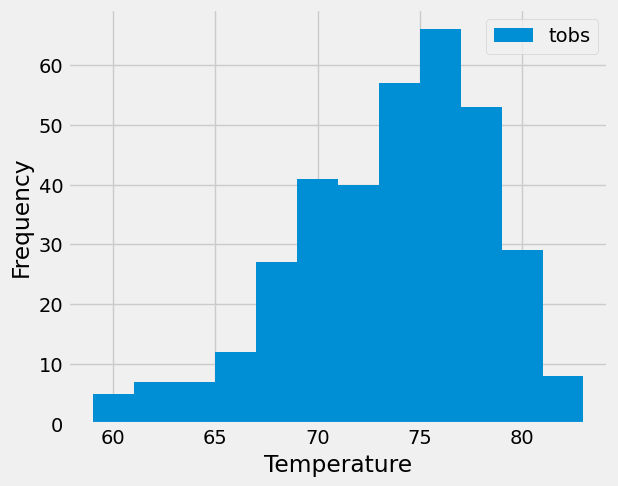

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()